## **Problem 4: Classifiers and Metrics - Coding**
**3.1** Copying the data from HW, transforming it into the numpy array and calculating
g(**x**) values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

thetaVector = 0.05, -3, 2.1, 0.008
theta0Default = 0.3

def g(x, thetaV=thetaVector, theta0=theta0Default):
    thetaV = np.array(thetaV)
    return np.matmul(thetaV, x) + theta0

dataRaw = """20 1 0 20 0
18 1 1 33 0
11 0 1 21 1
31 0 0 18 1
19 1 1 7 1
21 1 0 10 0
44 1 0 23 1
15 1 1 16 0
16 0 1 15 1
17 1 0 6 0"""
# transforming the data into an appropriate form
data = np.array([row.split(sep=' ') for row in dataRaw.split(sep='\n')], dtype=int).T
xArray = data[0:4, :]
print(g(xArray))

[-1.54   0.564  3.118  1.994  0.406 -1.57  -0.316  0.278  3.32  -1.802]


Now let's sort the data by Y values for an easier interpretation of the results
(First - elements Y=1, then Y=0). If we plot the sorted data with the values
g(**x**), we can clearly see that the threshold should be between
values 0.278 and 0.406. Let's choose the value $(0.276+0.406)/2\approx0.34$.
That value allows us to have only 1 false positive and 1 false negative value.

Text(0, 0.5, 'Y')

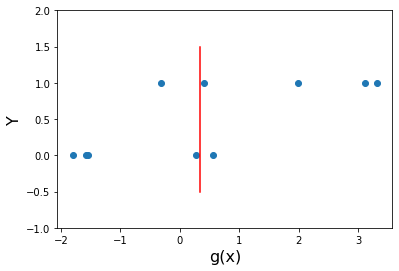

In [2]:
threshold = 0.34
dataSorted = data[:, data[4].argsort()[::-1]]
xArraySorted = dataSorted[0:4, :]
yArraySorted = dataSorted[4, :]
valuesSorted = g(xArraySorted)
plt.scatter(valuesSorted, yArraySorted)
plt.plot([threshold, threshold], [-0.5, 1.5], c='r')
plt.ylim(-1, 2)
plt.xlabel('g(x)', fontsize=16)
plt.ylabel('Y', fontsize=16)

**3.2** Let's calculate f(**x**) now. As we can see from the plot below, the new threshold value should be in between
0.271 and 0.385. Let's choose threshold$=(0.271+0.385)/2\approx0.33$

[-0.91212037  0.51093923  0.99609231  0.96360121  0.38507106 -0.91702576
 -0.30588564  0.27105303  0.99738936 -0.94701274]


Text(0, 0.5, 'Y')

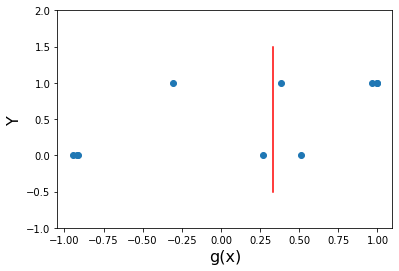

In [3]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def f(x, thetaV=thetaVector, theta0=theta0Default, func=tanh):
    thetaV = np.array(thetaV)
    return func(np.matmul(thetaV, x) + theta0)

print(f(xArray))  # unsorted data
sortedFValues = f(xArraySorted)  # sorted data

threshold = 0.33
plt.scatter(sortedFValues, yArraySorted)
plt.plot([threshold, threshold], [-0.5, 1.5], c='r')
plt.ylim(-1, 2)
plt.xlabel('g(x)', fontsize=16)
plt.ylabel('Y', fontsize=16)

F1 implementation

In [4]:
def F1(labels_predicted, labels_true, print_values=True):
    TP, FP, TN, FN = ([0]*4)
    for pr, y in zip(labels_predicted, labels_true):
        if pr == 1:
            if pr == y:
                TP += 1
            else:
                FP += 1
        else:
            if pr == y:
                TN += 1
            else:
                FN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2 * (precision * recall) / (precision + recall)
    if print_values:
        print(f'Precision={precision}, Recall={recall}, F1={F1: 1.5f}')
    return F1
yPredictedSorted = []
for v in sortedFValues:
    if v > threshold:
        yPredictedSorted.append(1)
    else:
        yPredictedSorted.append(0)
F1_values = F1(yPredictedSorted, yArraySorted)
print()

Precision=0.8, Recall=0.8, F1= 0.80000



We can see that with threshold=0.33 we have 1 false positive and 1 false negative prediction.
### Confusion matrix:
|  Total: 10   | Positive: 5 | Negative: 5 |
| --- | --- | --- |
| **Predicted Positive: 5** | True Positive (TP): 4 | False Positive (FP): 1 |
| **Predicted Negative: 5**  | False Negative (FN): 1 | True Negative (TN): 4 |

$\textbf{Precision}=\frac{\text{TP}}{\text{TP}+\text{FP}}=\frac{4}{4+1}=\textbf{0.8}$,

$\textbf{Recall}=\frac{\text{TP}}{\text{TP}+\text{FN}}=\frac{4}{4+1}=\textbf{0.8}$,

$\textbf{F1}=2\frac{\text{Precision}\times \text{Recall}}{\text{Precision}+
\text{Recall}}=\textbf{0.8}$.

**3.3**
ROC curve for $f(x)$.
Red circle represents decision points with the minimum classification error.

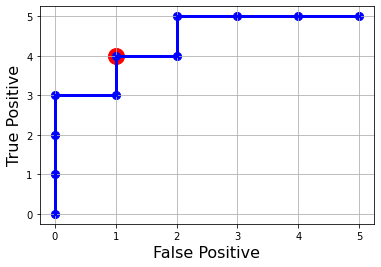

In [5]:
order = sortedFValues.argsort()[::-1]
fSorted = sortedFValues[order]
ySorted = yArraySorted[order]
valuesROC = np.zeros(len(order) + 1)
xROC = np.zeros(len(order) + 1)
for i, value in enumerate(ySorted):
    valuesROC[i+1] = valuesROC[i] + value
    xROC[i+1] = xROC[i] + (1 - value)
plt.plot(xROC, valuesROC, c='b', lw=3)
plt.scatter(1, 4, c='r', s=255)
plt.scatter(xROC, valuesROC, c='b', s=65)
# plt.ylim(-1, 2)
plt.xlabel('False Positive', fontsize=16)
plt.ylabel('True Positive', fontsize=16)
plt.grid()

Normalized ROC curve:

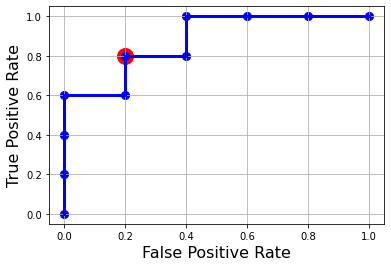

In [6]:
plt.plot(xROC / 5, valuesROC / 5, c='b', lw=3)
plt.scatter(1/5, 4/5, c='r', s=255)
plt.scatter(xROC / 5, valuesROC / 5, c='b', s=65)
# plt.ylim(-1, 2)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.grid()
